In [6]:
%matplotlib inline
import umap
import numpy as np
import matplotlib.pyplot as plt
from gensim.models import KeyedVectors

In [31]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

In [2]:
fp = "~/Downloads/soft/dna2vec/pretrained/dna2vec-20161219-0153-k3to8-100d-10c-29320Mbp-sliding-Xat.w2v"
mk_model = KeyedVectors.load_word2vec_format(fp, binary=False)
kmers = list(mk_model.vocab.keys())
vectors = np.stack([mk_model[a] for a in kmers])

In [3]:
emb = umap.UMAP().fit_transform(vectors)

In [9]:
rand_100 = np.random.choice(range(emb.shape[0]), size=100)

In [17]:
emb[1]

array([ 5.4762597 , -0.20573613])

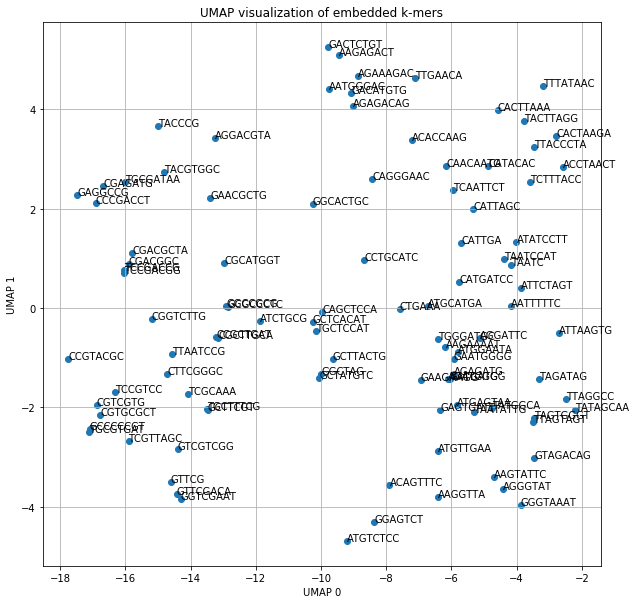

In [32]:
plt.scatter(emb[rand_100][:,0], emb[rand_100][:,1])
for a in rand_100:
    xy = emb[a]
    plt.annotate(kmers[a], xy)
plt.grid(True)
plt.xlabel("UMAP 0")
plt.ylabel("UMAP 1")
plt.title("UMAP visualization of embedded k-mers")
plt.show()

In [46]:
def overlapping(s, ks):
    kmers = []
    for a in range(len(s)):
        kmers.append(s[a:a+np.random.choice(ks)])
    return(np.array(kmers[0:len(kmers)-min(ks)+1]))

In [33]:
s = "the quick brown fox jumps over the lazy dog"

In [35]:
s.split()

['the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']

In [48]:
a = "ATTATAGGCGACGATAGCGATAGCGATAGCGATCGTACG"

In [49]:
overlapping(a, [3,4,5])

array(['ATTA', 'TTATA', 'TAT', 'ATAG', 'TAGGC', 'AGG', 'GGCG', 'GCGA',
       'CGAC', 'GACG', 'ACG', 'CGAT', 'GATA', 'ATAGC', 'TAGCG', 'AGCGA',
       'GCGAT', 'CGA', 'GATA', 'ATA', 'TAG', 'AGCG', 'GCGA', 'CGAT',
       'GAT', 'ATA', 'TAGC', 'AGC', 'GCGA', 'CGATC', 'GATCG', 'ATC',
       'TCG', 'CGTA', 'GTAC', 'TACG', 'ACG'], dtype='<U5')